In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import os
import cv2
import csv

C:\python 37\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


cat    4000
dog    4000
Name: label, dtype: int64

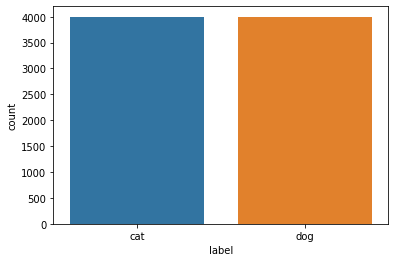

In [2]:
# Load the data
train = pd.read_csv("train_labels.csv")

Y_train1 = train["label"]
 
g = sns.countplot(Y_train1)

Y_train1.value_counts()

In [3]:
#encoding cat and dog to 0 and 1 respectively 
label1 = [0]
label2 = [0]
Y_train = []

for label in Y_train1:
    if label=='cat':
        label1 = 1
        Y_train.append(label1)
    elif label=='dog':
        label2 = 0
        Y_train.append(label2)
Y_train

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [4]:
X_train1 = train["id"]
X_train1

X_train = []
path = 'train_data'
for i in range(len(X_train1)):
        img = cv2.imread(os.path.join(os.getcwd(),f"train_data/{X_train1[i]}.png"))
        X_train.append(img)


In [5]:
data = []

for i in range(len(X_train1)):
    data.append([X_train[i], Y_train[i]])
 

In [6]:
X_train= np.array(X_train)
Y_train= np.array(Y_train)

X_train= X_train/255

X_train[0].shape

(32, 32, 3)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import layers, models, optimizers

In [8]:
# model = models.Sequential()

# model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Conv2D(32, (3, 3)))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Conv2D(64, (3, 3)))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Flatten())
# model.add(layers.Dense(128))
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(64))
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(1))
# model.add(layers.Activation('sigmoid'))
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               147584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [10]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
cnn.fit(X_train, Y_train, epochs=25, validation_split = 0.2, batch_size=86)

Epoch 1/25
75/75 [==============================] - 8s 84ms/step - loss: 0.6529 - accuracy: 0.6413 - val_loss: 0.7662 - val_accuracy: 0.4075
Epoch 2/25
75/75 [==============================] - 6s 76ms/step - loss: 0.6272 - accuracy: 0.6667 - val_loss: 0.9053 - val_accuracy: 0.2875
Epoch 3/25
75/75 [==============================] - 6s 77ms/step - loss: 0.5971 - accuracy: 0.6939 - val_loss: 0.7116 - val_accuracy: 0.5150
Epoch 4/25
75/75 [==============================] - 6s 76ms/step - loss: 0.5686 - accuracy: 0.7203 - val_loss: 0.7193 - val_accuracy: 0.5150
Epoch 5/25
75/75 [==============================] - 6s 76ms/step - loss: 0.5403 - accuracy: 0.7411 - val_loss: 0.6650 - val_accuracy: 0.5844
Epoch 6/25
75/75 [==============================] - 6s 75ms/step - loss: 0.5158 - accuracy: 0.7498 - val_loss: 0.8042 - val_accuracy: 0.5075
Epoch 7/25
75/75 [==============================] - 6s 76ms/step - loss: 0.4986 - accuracy: 0.7592 - val_loss: 0.6255 - val_accuracy: 0.6313
Epoch 8/25
75

In [12]:
test = pd.read_csv("test_labels.csv")

Y_test1 = test["label"]
#encoding cat and dog to 0 and 1 respectively 
label3 = [0]
label4 = [0]
Y_test = []

for label in Y_test1:
    if label=='cat':
        label3 = 1
        Y_test.append(label3)
    elif label=='dog':
        label4 = 0
        Y_test.append(label4)
        
X_test1 = test["id"]
X_test1

X_test = []
path = 'test_data'
for i in range(len(X_test1)):
        img = cv2.imread(os.path.join(os.getcwd(),f"test_data/{X_test1[i]}.png"))
        X_test.append(img)
        
data = []

for i in range(len(X_test1)):
    data.append([X_test[i], Y_test[i]])
    
X_test= np.array(X_test)
Y_test= np.array(Y_test)

X_test= X_test/255

X_test[0].shape

(32, 32, 3)

In [13]:
cnn.evaluate(X_test, Y_test)

63/63 [==============================] - 1s 13ms/step - loss: 0.8913 - accuracy: 0.7235


[0.8912978172302246, 0.7235000133514404]

In [35]:
loss, acc = cnn.evaluate(X_test, Y_test, batch_size=86)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

24/24 [==============================] - 1s 21ms/step - loss: 0.5522 - accuracy: 0.7300 0s - loss: 0.5529 - accuracy: 0.72

Test accuracy: 73.0%
